In [2]:
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12.0,8.0]

In [4]:
inventory=pd.read_csv('inventory.csv')
inventory

,Month,Inventory
0,01-01-2019,0
1,02-01-2019,82
2,03-01-2019,2031
3,04-01-2019,8152
4,05-01-2019,8804
5,06-01-2019,9442
6,07-01-2019,5897
7,08-01-2019,6796
8,09-01-2019,4805
9,10-01-2019,4545


In [5]:
inventory.isnull().sum()

Month        0
Inventory    0
dtype: int64

In [6]:
inventory['Month']=pd.to_datetime(inventory['Month'])

In [7]:
inventory=inventory.set_index('Month')
inventory.head()

,Inventory
Month,
2019-01-01,0
2019-02-01,82
2019-03-01,2031
2019-04-01,8152
2019-05-01,8804


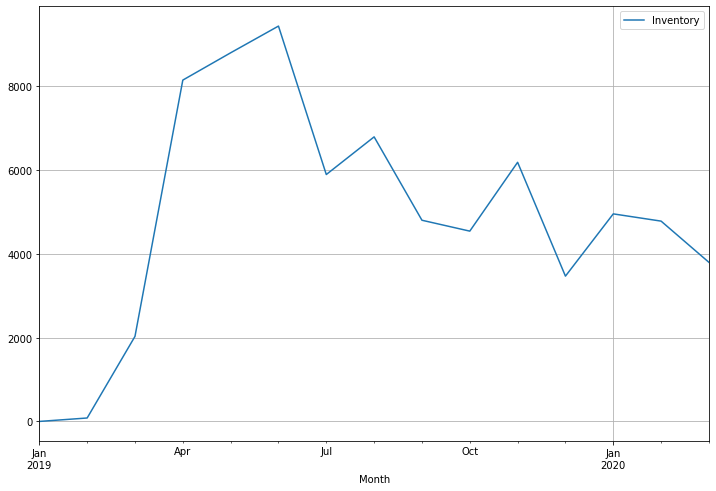

In [8]:
inventory.plot(grid=True)

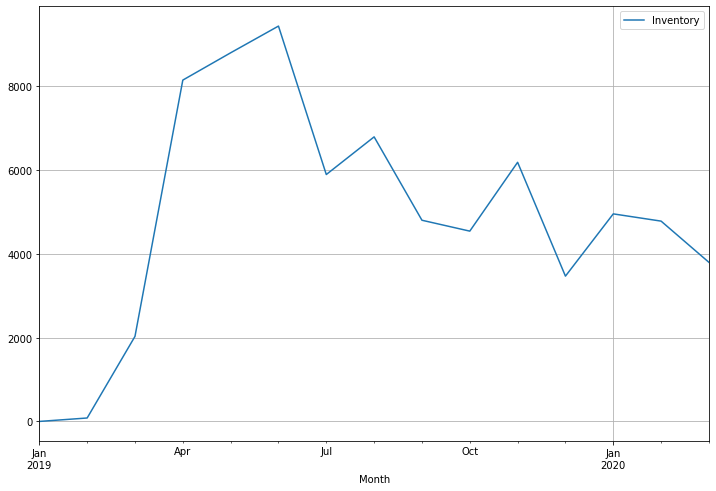

In [9]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2019, 1, 1)
end_date=datetime(2020, 12, 1)
inventory[(start_date <= inventory.index) & (inventory.index <= end_date)].plot(grid=True)

In [10]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(inventory, model='multiplicative')
fig=decomposition.plot()
matplotlib.rcParams['figure.figsize']=[9.0,5.0]

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(sales.index, sales['Sales'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')